<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 1 - Simple and Multiple Linear Regression</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two linear regression models- Simple Linear Regression and Multiple Linear Regression.**



**Guidelines**

* Make sure to run all the code cells, otherwise you may get errors like NameError for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as IPYNB file and submit to D2L `Lab 1 - Simple and Multiple Linear Regression (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Simple Linear Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `House Prices.csv` file into a dataset and perform the following:

> **Q1.1.** Visualize the dataset

> **Q1.2.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.3.** Fit a regression model to predict the house `price` based on the house `square_footage` 

> **Q1.4.** Evaluate and discuss the model goodness of fit

In [601]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import seaborn as sns
%matplotlib inline


In [602]:
#Import/Read Dataset
dataset_df = pd.read_csv("House Prices.csv")
# dataset_df.describe()
dataset_df['price'].describe()

count      1000.00000
mean      75086.47110
std       22526.24462
min       23919.44000
25%       57493.73000
50%       74970.70000
75%       91349.24750
max      134557.20000
Name: price, dtype: float64

#### Q 1.1 Performing EDA / Visualizing the Dataset

In [603]:
#Perfoming EDA
dataset_df.info()
dataset_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   square_footage  1000 non-null   float64
 1   price           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


,square_footage,price
0,1932.65,66690.35
1,4340.14,111116.52
2,3464.18,83877.06
3,3487.12,81352.80
4,3067.75,96720.25
5,1935.86,66420.62
6,2891.17,81435.23
7,2203.01,86729.19
8,3512.30,118094.00
9,3890.66,103916.88


Pearson corr. coef 0.8334105319708631 and P-value is 2.8179973064407554e-259


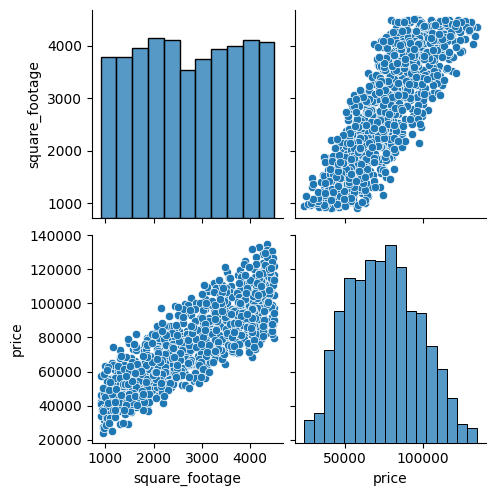

<Axes: >

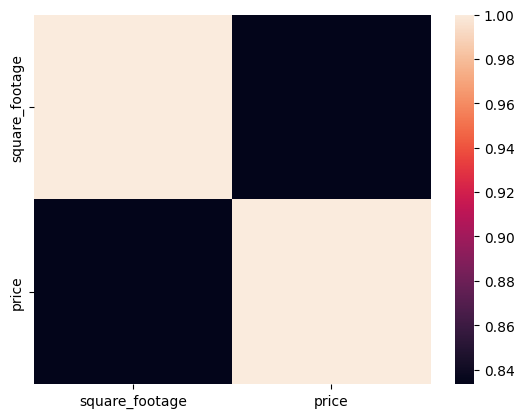

In [604]:
#Some more correlational analysis between variables
corr_coef, p_val = stat.pearsonr(dataset_df['square_footage'], dataset_df['price'])
print(f"Pearson corr. coef {corr_coef} and P-value is {p_val}")
sns.pairplot(dataset_df)
plt.show()
#More visuals using heatmap on correlation
sns.heatmap(dataset_df.corr())

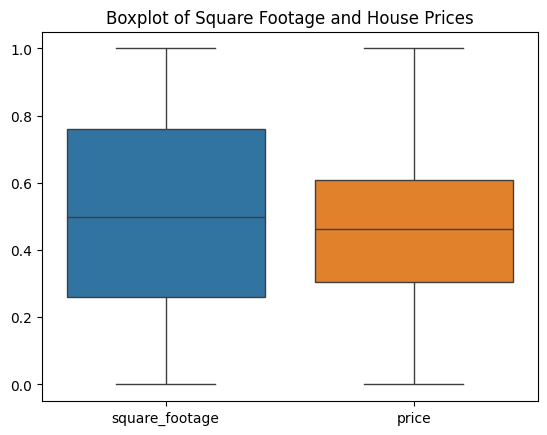

In [605]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(dataset_df), columns=dataset_df.columns)

plt.figure()
sns.boxplot(data=df_normalized)
plt.title('Boxplot of Square Footage and House Prices')
plt.show()


In [606]:
X = dataset_df.iloc[:,:-1].values # Accessing the Square_foot - independent variable array.
y = dataset_df.iloc[:,-1].values #Accessing the Price - dependent variable array (the last one is the target to be predicted so).


In [607]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2 , random_state = 42)


In [608]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [609]:
y_pred =regression_model.predict(X_test)
print(y_pred)

[ 49850.87327708  89336.50519559  59182.87141343  97447.98576731
  93224.70219959  80985.54798044  85019.96128975  98688.20367469
  52788.03171672  62980.33839855  50687.86673803  44106.50636507
  43779.73370746 105278.60090212  57711.67150581  75862.19370757
  67420.86794772 104155.50062866  94193.27226162  68473.30001922
  56374.9399927   97627.63843416  77171.81465727  97583.53858435
  99153.96315404  78068.99356899  48052.90071185  92492.1747763
  75550.60296546  53053.71523811  74253.63361202  75921.83694706
 105768.57915145  57905.60240273  90534.61136114  55406.55066776
  90569.4936194   98175.63328919  86094.98549743  67700.468225
  82929.3753768   72508.79775107  50707.38634368  92590.31501584
  91957.55446589  44843.19074141  88275.93995507  70065.77451382
  69647.0066777   71707.40949672  80132.10744435  63725.69815519
  80253.74350551  81856.33927711  89734.30752934  88147.43588451
  62778.99728097 103207.89606901  96011.84885504  52237.14506826
  63395.1300187   88207.6213

In [610]:
print(y_test)

[ 29472.88 109092.8   76171.4   94505.38  89701.05  60394.35  95164.18
  83317.4   78992.    52864.36  45703.2   28949.15  45817.6  100764.
  60352.26  65738.58  68788.86 122402.2   76203.9   60686.    50541.2
 108492.44  80863.76  87934.16  98131.01  89853.4   53957.72  83226.98
  50617.7   60255.3   74598.76  81844.8  106569.67  44146.5   79661.71
  66176.57 114619.2   99150.6   73060.83  72586.08  65201.44  77540.32
  59775.54  74945.92  71591.12  53419.26 108871.88  61873.87  73869.1
  77953.98  70958.19  86481.08  91794.4   83205.05  95963.    89155.8
  58959.1  101174.94 105106.6   57040.39  64469.6  105272.72  69923.2
  84444.08  56384.48  65908.35 110490.71  90045.36  42191.7   79679.8
  78031.68  94722.6   63774.48  54181.52  92568.07  95400.    70248.
  73475.35  73247.92  86076.65 101256.08  93363.82  72973.85  91351.55
  94039.2   89918.3   88219.72  36664.14  74358.6   43500.43  90594.27
  76857.7   71876.45  66727.6   75903.94  53743.    81142.3   65726.16
  73934.38  998

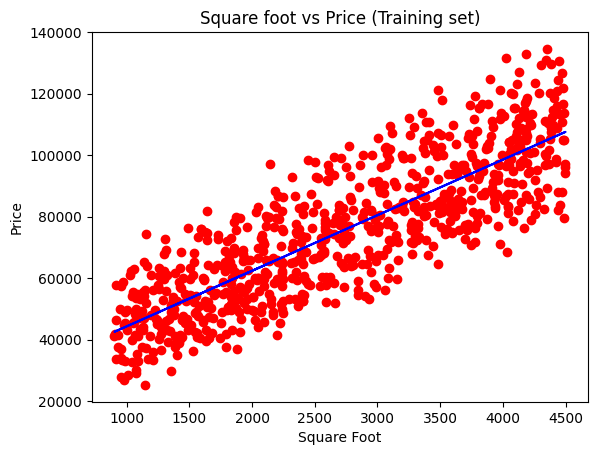

In [611]:
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regression_model.predict(X_train), color='blue') # plotting the regression line
plt.title("Square foot vs Price (Training set)") # stating the title of the graph
  
plt.xlabel("Square Foot") # adding the name of x-axis
plt.ylabel("Price") # adding the name of y-axis
plt.show() # specifies end of graph

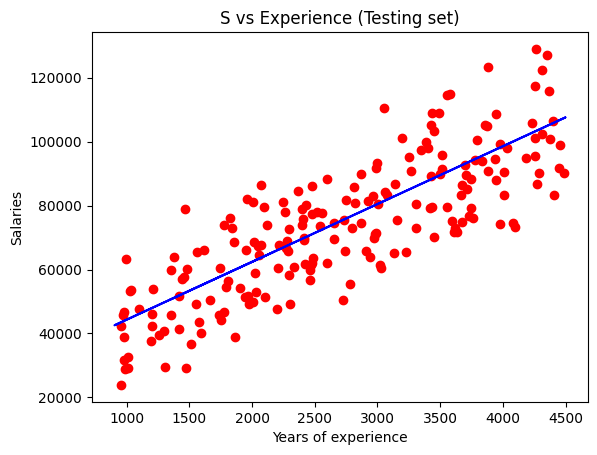

In [612]:
#plot for the TEST
  
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regression_model.predict(X_train), color='blue') # plotting the regression line
plt.title("S vs Experience (Testing set)")
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 

In [613]:
print(regression_model.coef_)

[18.07370894]


In [614]:
print(regression_model.intercept_)

26253.115938269286


In [615]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6647480578175518

# Question 2: Multiple Linear Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `Car Prices.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset: This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 

> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Fit a regression model to predict the car `price` based on the other features in the dataset 

> **Q2.5.** Evaluate and discuss the model goodness of fit

In [616]:
car_dataframe = pd.read_csv("Car Prices.csv")
car_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [617]:
car_dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [618]:
print(car_dataframe.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


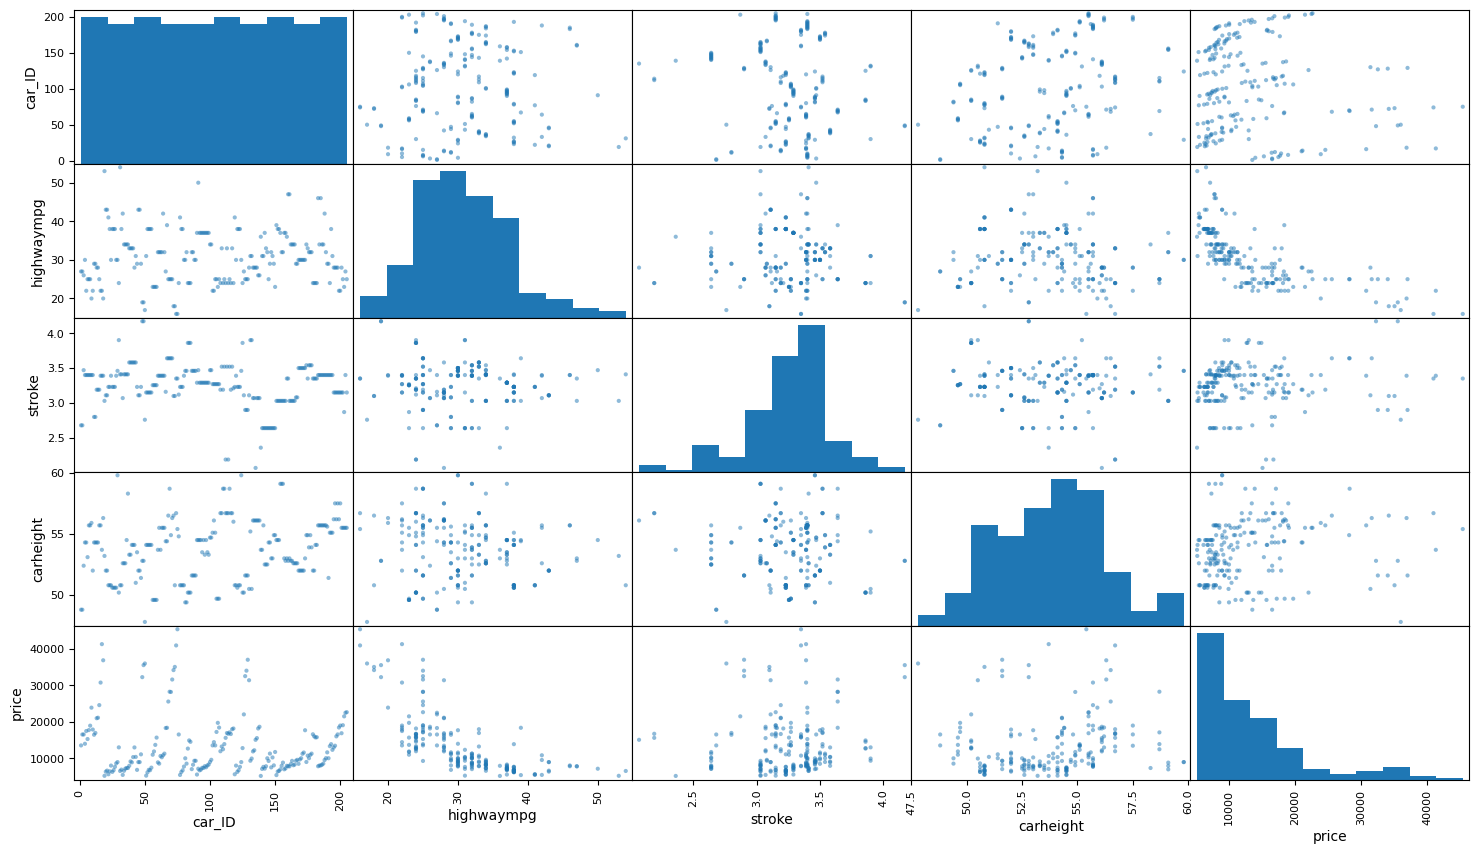

In [619]:
from pandas.plotting import scatter_matrix

attributes = ['car_ID', 'highwaympg',
       'carbody', 'stroke','carheight', 'price',]
scatter_matrix(car_dataframe[attributes], figsize=(18, 10))
plt.show()

In [620]:


car_dataframe = car_dataframe.drop(columns=['car_ID','CarName'])

# Identify missing values
missing_values = car_dataframe.isnull().any()
print(missing_values) #Printing the series after checking missing values




symboling           False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool


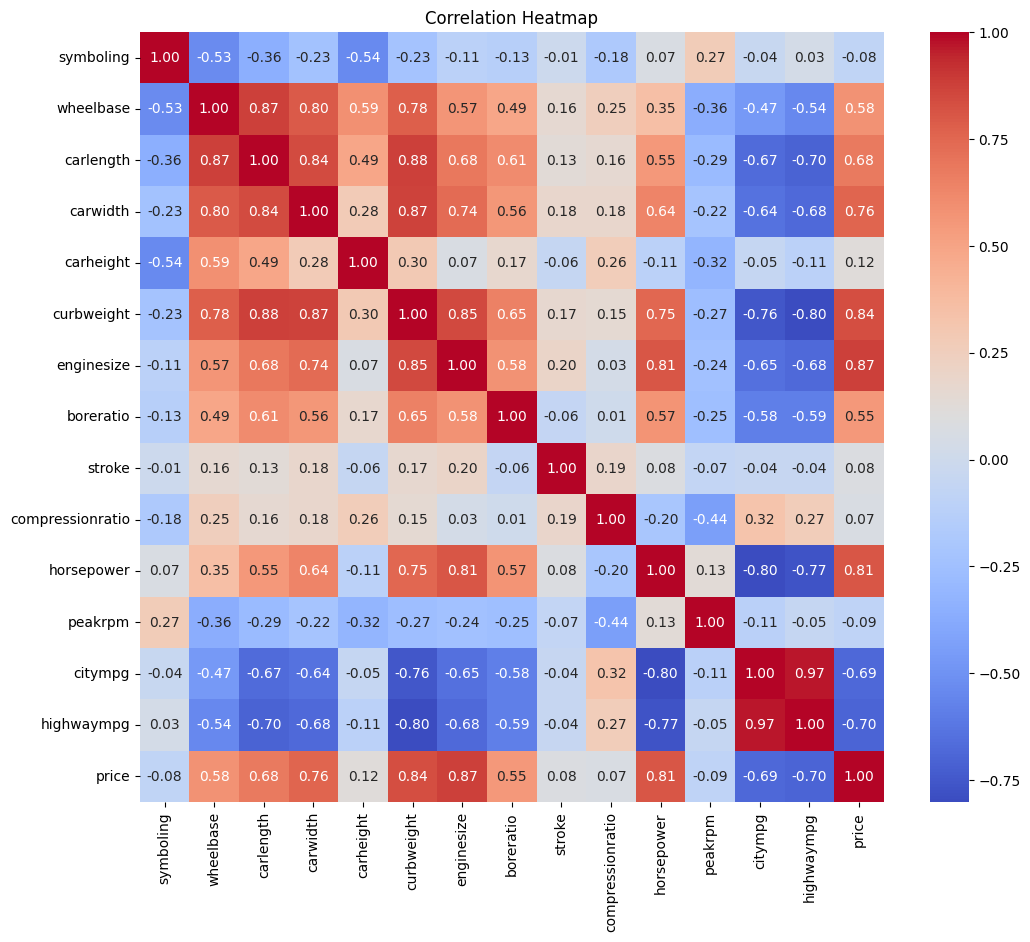

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


In [621]:
 # Assuming 'car_dataframe' is your DataFrame containing features
correlation_matrix = car_dataframe.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print(correlation_matrix['price'])

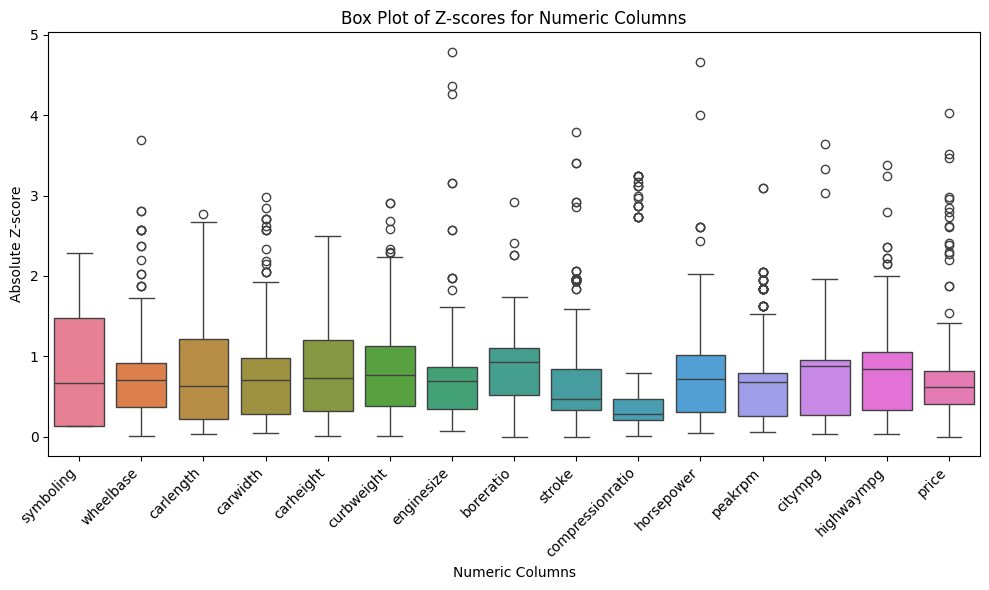

Updated DataFrame:
      symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0            front       88.6   

/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_1541/1888684625.py:113: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outlier_columns_mean.fillna(0, inplace=True)


In [622]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy import stats

# Extract numeric columns
# numeric_columns = car_dataframe.select_dtypes(include=['number'])

# # Apply Min-Max scaling to numeric columns
# scaler = MinMaxScaler()
# scaled_numeric_columns = scaler.fit_transform(numeric_columns)
# scaled_numeric_df = pd.DataFrame(scaled_numeric_columns, columns=numeric_columns.columns)

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming 'car_dataframe' contains your DataFrame






# # Draw boxplot to identify outliers with custom color
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=scaled_numeric_df)
# plt.title('Boxplot of Numeric Columns')
# plt.xlabel('Column')
# plt.ylabel('Value')
# plt.xticks(rotation=45)
# plt.show()


# Compute Z-scores for numeric columns
numeric_columns = car_dataframe.select_dtypes(include=['number'])
z_scores = stats.zscore(numeric_columns)

# Create a DataFrame of absolute Z-scores
abs_z_scores_df = pd.DataFrame(np.abs(z_scores), columns=numeric_columns.columns)

# Plot box plot for Z-scores of each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=abs_z_scores_df)
plt.title('Box Plot of Z-scores for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Absolute Z-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# # Calculate Z-scores
# z_scores = stats.zscore(numeric_columns)
# abs_z_scores = np.abs(z_scores)

# # Identify rows with outliers
# outlier_rows = (abs_z_scores > 3).any(axis=1)
# print(car_dataframe[outlier_rows].shape[0])
# # Remove rows with outliers
# car_dataframe_not = car_dataframe[~outlier_rows]
# print(car_dataframe_not.shape[0])

from sklearn.preprocessing import RobustScaler

# # Calculate Z-scores
z_scores = stats.zscore(car_dataframe.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)

# # Identify outlier values
# outlier_mask = abs_z_scores > 3
# outlier_values = car_dataframe[outlier_mask]
# outlier_values.to_excel('before.xlsx', index=False)

# # Transform only the outlier values using RobustScaler
# scaler = RobustScaler()
# outlier_values_transformed = scaler.fit_transform(outlier_values)

# # Replace outlier values in the original DataFrame with the transformed values
# car_dataframe[outlier_mask] = outlier_values_transformed

# # Print the updated DataFrame
# print(car_dataframe)


# # Identify outlier values
# outlier_mask = abs_z_scores > 3
# outlier_values = car_dataframe[outlier_mask]

# outlier_values.to_excel('after.xlsx', index=False)

# # Get numeric columns only
# numeric_columns = car_dataframe.select_dtypes(include=np.number).columns

# # Calculate mean value of columns containing outliers
# outlier_columns_mean = outlier_values.mean()

# # Replace outlier values with mean value of respective columns
# for column in numeric_columns:
#     car_dataframe.loc[outlier_mask[column], column] = outlier_columns_mean[column]


# Identify outlier values
# Identify outlier values
outlier_mask = abs_z_scores > 3
outlier_values = car_dataframe[outlier_mask]

# Get numeric columns only
numeric_columns = car_dataframe.select_dtypes(include=np.number).columns

# Calculate mean value of columns containing outliers
outlier_columns_mean = outlier_values.mean()

# Replace NaN values in mean with 0
outlier_columns_mean.fillna(0, inplace=True)

# Replace outlier values with mean value of respective columns
for column in numeric_columns:
    mean_value = outlier_columns_mean[column]
    # Cast the mean value to the dtype of the column
    mean_value_casted = car_dataframe[column].dtype.type(mean_value)
    car_dataframe.loc[outlier_mask[column], column] = mean_value_casted

# Print updated dataframe
print("Updated DataFrame:\n", car_dataframe)






car_dataframe.to_excel('after.xlsx', index=False)









In [623]:
# Identify outliers in the scaled numeric DataFrame - IQR
# Q1 = scaled_numeric_df.quantile(0.25)
# Q3 = scaled_numeric_df.quantile(0.75)
# IQR = Q3 - Q1

# # Define a threshold to identify outliers
# threshold = 1.5

# # Identify outliers
# outliers = (scaled_numeric_df < (Q1 - threshold * IQR)) | (scaled_numeric_df > (Q3 + threshold * IQR))

# # Display rows containing outliers
# rows_with_outliers = car_dataframe[outliers.any(axis=1)]
# print(rows_with_outliers.shape[0])
# car_dataframe_without_outlier = car_dataframe[~outliers.any(axis=1)]
# print(car_dataframe_without_outlier.shape[0])





In [624]:




# # Identify categorical columns
categorical_cols = car_dataframe.select_dtypes(exclude=['number']).columns.tolist()

# # Perform one-hot encoding for nominal categorical columns

car_dataframe = pd.get_dummies(car_dataframe, columns=categorical_cols)
# Assuming 'car_dataframe' is your DataFrame
# Assuming 'car_dataframe' is your DataFrame
car_dataframe = car_dataframe.map(lambda x: 1 if x == True else (0 if x == False else x))

# # Assuming 'car_dataframe' is your DataFrame and 'column_index' is the index of the column you want to move
column_name = 'price'
column_index = car_dataframe.columns.get_loc(column_name)
# # Create a list of column names with the specified column moved to the last position
new_column_order = list(car_dataframe.columns[:column_index]) + list(car_dataframe.columns[column_index+1:]) + [column_name]

# Reindex the DataFrame with the new column order
car_dataframe = car_dataframe.reindex(columns=new_column_order)
print(sorted(car_dataframe.columns.tolist()))


# Assuming 'car_dataframe' is the DataFrame you want to write to Excel
cols = car_dataframe.columns.tolist()
car_dataframe.to_excel('car_data1.xlsx', index=False)





['aspiration_std', 'aspiration_turbo', 'boreratio', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'doornumber_four', 'doornumber_two', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginesize', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_diesel', 'fueltype_gas', 'highwaympg', 'horsepower', 'peakrpm', 'price', 'stroke', 'symboling', 'wheelbase']


In [625]:
# Extracting the Independent and Dependent variables
X = car_dataframe.iloc[:, :-1].values
y = car_dataframe.iloc[:, -1].values

print("Features are =>\t", sorted(car_dataframe.columns[:-1].tolist()))
print("\n")
print("Target is => \t",car_dataframe.columns[-1])

Features are =>	 ['aspiration_std', 'aspiration_turbo', 'boreratio', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'doornumber_four', 'doornumber_two', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginesize', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_diesel', 'fueltype_gas', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'symboling', 'wheelbase']


Target is => 	 price


In [626]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [627]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [628]:
y_pred = regressor.predict(X_test)
print(X_test)
y_pred 

[[  0.  103.5 189.  ...   1.    0.    0. ]
 [  0.   99.5 178.2 ...   1.    0.    0. ]
 [  0.   97.2 173.4 ...   0.    0.    0. ]
 ...
 [  0.   94.5 155.9 ...   0.    0.    0. ]
 [  3.   95.9 173.2 ...   0.    1.    0. ]
 [  0.   97.  173.5 ...   0.    0.    0. ]]


array([28267.39992804, 20475.45206002, 10608.65862431, 13084.59021419,
       27124.37158946,  5716.40296935,  8685.64060916,  7947.14801427,
        9016.60328135,  9489.94255781, 17111.86903279,  7628.57523619,
       17370.33912124,  8769.75703542, 41518.15637573,  6576.98060311,
        -669.89922279, 13350.39391663, 10587.15042363, 10142.84759366,
       11030.01821842, 16735.38997314,  4721.19067714,  2801.73127882,
        7221.74019789, 28566.02913609, 11723.53854394, 16739.25268905,
        4999.03128309, 17608.40924548, 27583.08291715,  6366.10278075,
        6698.59565157, 20114.70776956,  7204.21186381, 25070.26386673,
       12544.68817086, 12736.62895155,  6551.73297623, 13648.59995409,
        6942.61606825])

In [629]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8820962617917123

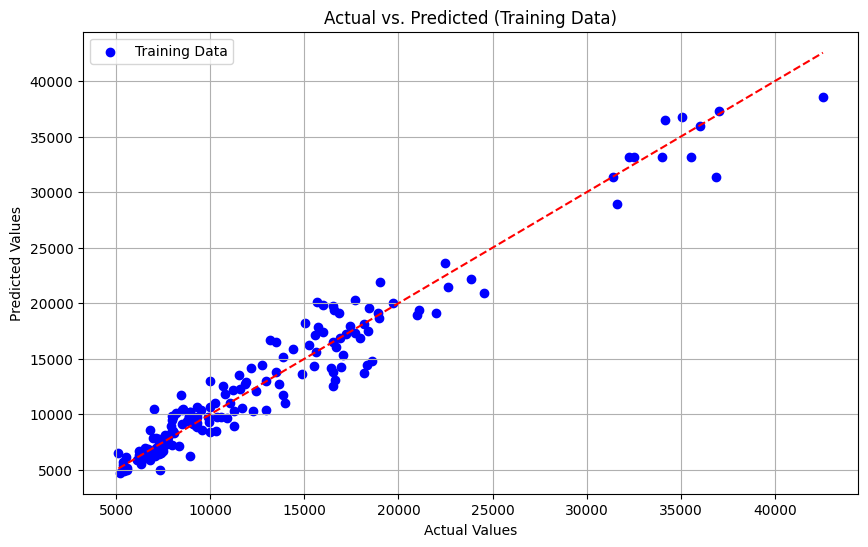

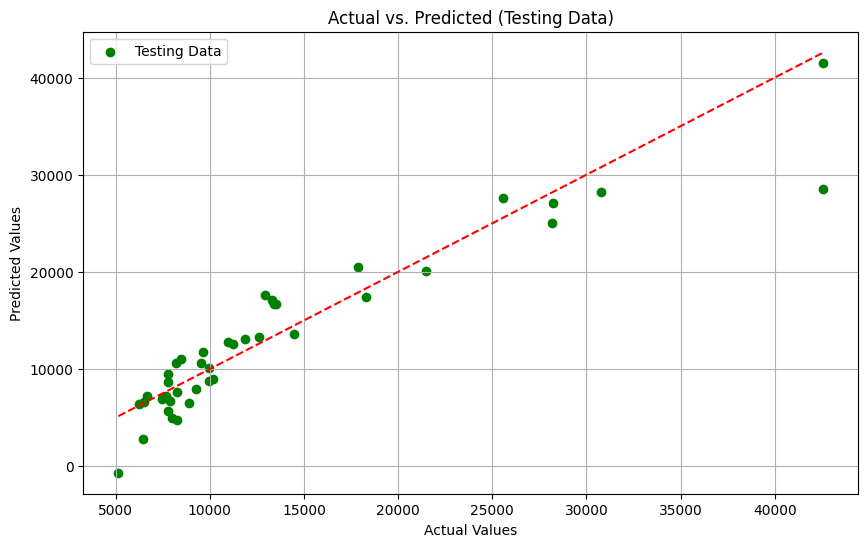

In [630]:


# Make predictions on training and testing data
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

# Plot the actual vs. predicted values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the actual vs. predicted values for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='green', label='Testing Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Testing Data)')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit Lab7.ipynb to the **Lab1- Simple and Multiple Linear Regression (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection